# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

## Part 1

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



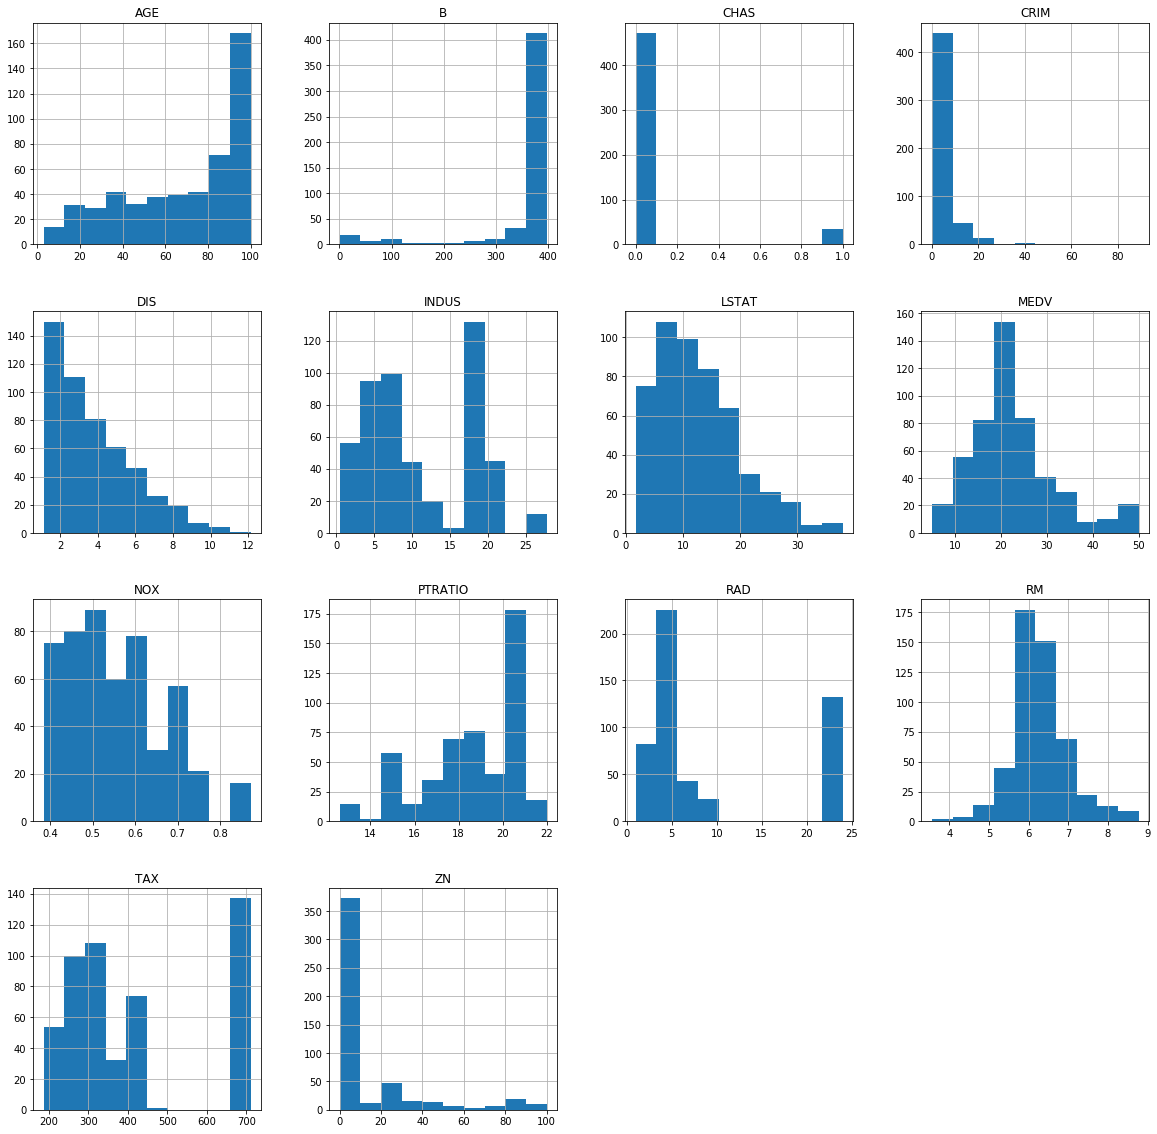

In [4]:
data.hist(figsize=(20,20))
plt.show()

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Графики по типам:

    Нормальное - RM
    Равномерное - PTRATIO
    Биноминальное - MEDV
    Бернулли - CHAS
    Геометрическое - DIS
    Логнормальное - LSTAT, возможно RAD


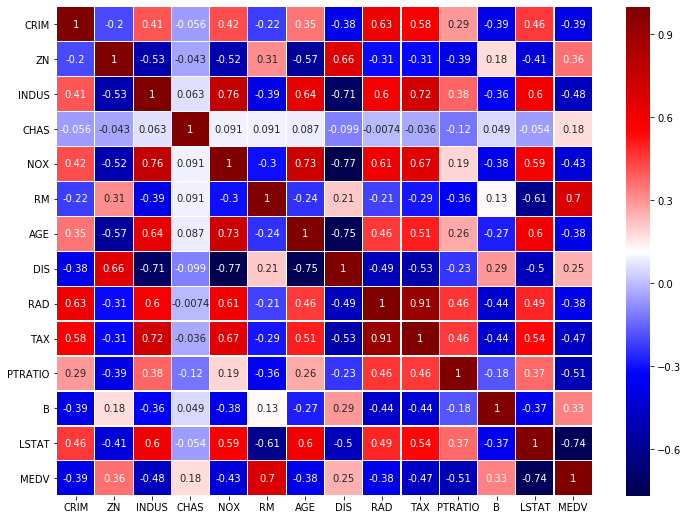

In [6]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

sns.heatmap(data.corr(),annot=True,cmap='seismic',linewidths=0.2)

На одном из занятий обсуждалось, что в колонке ZN много выбросов. На самом деле это не так - просто такова структура данных, в старых районах нет больших участков под жилье. Также был преобразован этнический состав населения таким образом, чтобы убрать корреляции между цветом кожи и другими параметрами

In [7]:
#Убираем районы, в которых белого населения менее 74% - именно до этой границы сворачивают данные. 
#Удаляется всего 36 районов
data_s = data.drop(data.loc[data['B'] < 137].index)

In [8]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 505
Data columns (total 14 columns):
CRIM       470 non-null float64
ZN         470 non-null float64
INDUS      470 non-null float64
CHAS       470 non-null int64
NOX        470 non-null float64
RM         470 non-null float64
AGE        470 non-null float64
DIS        470 non-null float64
RAD        470 non-null int64
TAX        470 non-null float64
PTRATIO    470 non-null float64
B          470 non-null float64
LSTAT      470 non-null float64
MEDV       470 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.1 KB


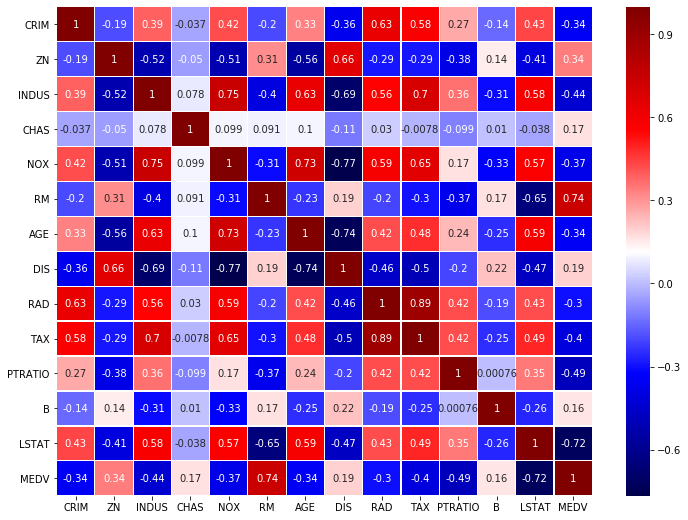

In [9]:
#Матрица корреляции
ax = sns.heatmap(data_s.corr(),annot=True,cmap='seismic',linewidths=0.2)

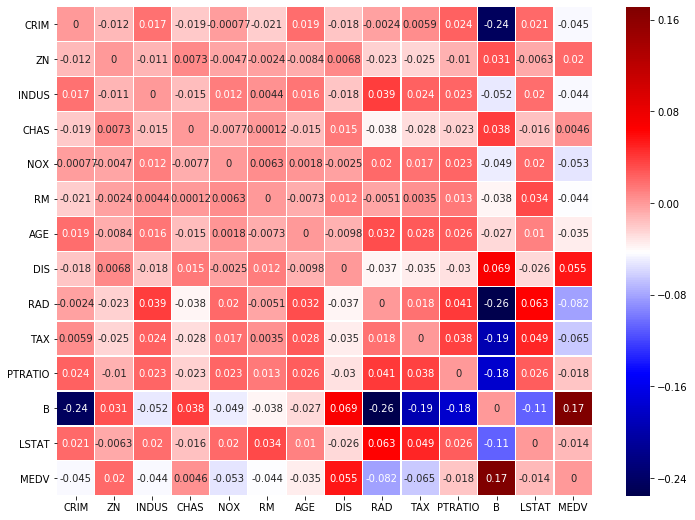

In [10]:
#Так как само значение корреляции ни о чем не говорит, посмотрим на какие места повлияло удаление столбцов
sns.heatmap((data.corr()-data_s.corr()),annot=True,cmap='seismic',linewidths=0.2)

Наибольшее изменение произошло для корреляции с криминальностью, удаленностью, налогами, количеством учителей и стоимостью жилья. Что, в общем то и ожидалось)

## Part 2 
Данную таблицу я (имхо) достаточно много препарировал на 1-м ДЗ. Постараюсь не повторяться)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [11]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

В выборке 156 стран. Не очень понял про проблему классификации. Если предсказывать место на основе других пораметров, то это регрессия

In [13]:
#Remove NAN
data = data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           140 non-null object
Ladder                     140 non-null int64
SD of Ladder               140 non-null int64
Positive affect            140 non-null float64
Negative affect            140 non-null float64
Social support             140 non-null float64
Freedom                    140 non-null float64
Corruption                 140 non-null float64
Generosity                 140 non-null float64
Log of GDP
per capita      140 non-null float64
Healthy life
expectancy    140 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.1+ KB


Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

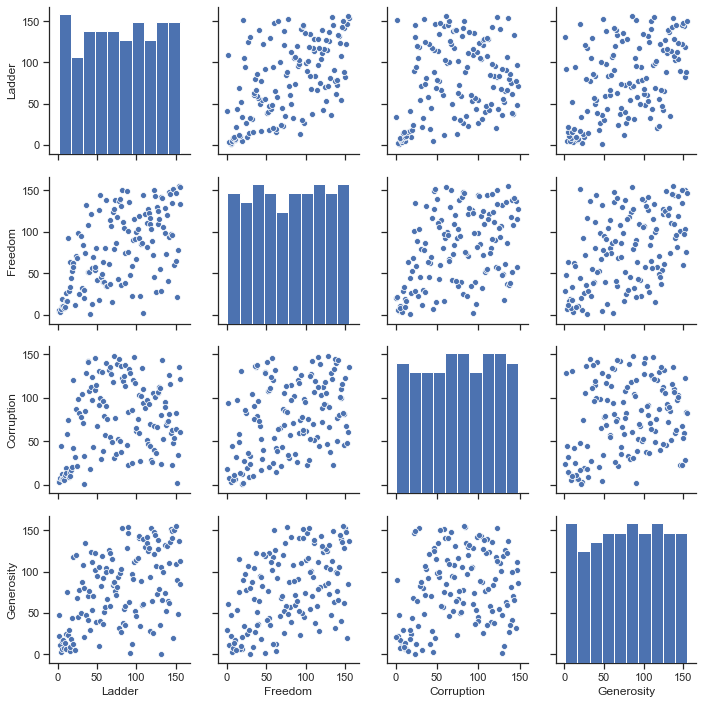

In [15]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data[['Ladder', 'Freedom', 'Corruption', 'Generosity']], )
plt.show()

In [16]:
#Let's try to do it in color - load country to region mapping
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
mapping = pd.read_csv(url)

In [17]:
mapping=mapping.dropna(subset=['region'])

In [18]:
mapping = mapping[['name', 'region']]
# mapping.head()

In [19]:
#КОманда ниже не работает, так как имена различаются в таблицах различаются. 
#Например - 'United Kingdom' vs 'United Kingdom of Great Britain...'. 
#Будем писать поиск
# data=data.merge(mapping, how='left', left_on='Country (region)', right_on='name')

def find_region(country):
    for idx, current in mapping.iterrows():
#         print(current)
        if current['name'].find(country) >= 0:
            return current['region']
    
    return 'Other'

In [20]:
data['region'] = data['Country (region)'].apply(find_region)
data.head()
# mapping[['name', 'region']]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,region
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe


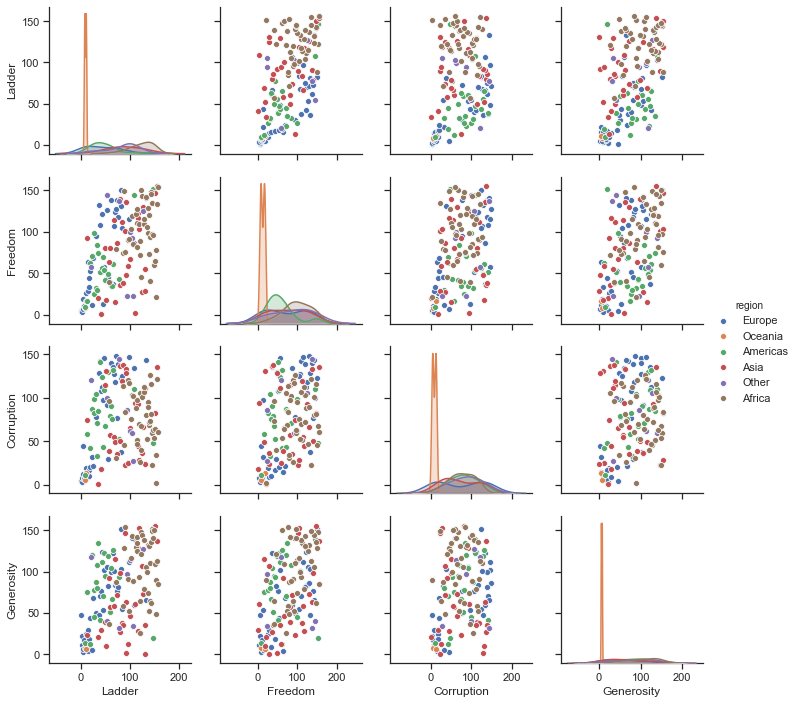

In [21]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data[['Ladder', 'Freedom', 'Corruption', 'Generosity', 'region']], hue='region')

На большинстве графиков Европа и Америка рядом - в лидирующих позициях. Азия сильно размазана, Африка отстает. То есть, в Европе и Америке жить хорошо, в Азии - как получится, в Африке лучше не надо))

In [22]:
#Повторим для файла с сырыми данными
my_url = 'https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls'
my_df = pd.read_excel(my_url)
my_df = my_df[my_df.columns[:11]]
my_df = my_df.drop( my_df.loc[my_df['Country name'] == 'Palestinian Territories'].index )
my_df = my_df.drop( my_df.loc[my_df['Country name'] == 'North Cyprus'].index )
my_df = my_df.drop( my_df.loc[my_df['Country name'] == 'Taiwan Province of China'].index )
my_df = my_df.fillna(method='ffill')
my_df = my_df[ my_df.Year == 2018]
my_df = my_df.drop(columns = 'Year')
my_df = my_df.rename(columns = {'Country name':'Country (region)', 'Life Ladder':'Ladder', 
                                'Healthy life expectancy at birth':'Healthy life expectancy', 'Freedom to make life choices':'Freedom',
                               'Perceptions of corruption':'Corruption'})
my_df = my_df.reset_index()
my_df = my_df.drop(columns = 'index')


In [23]:
my_df.head()

,Country (region),Ladder,Log GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
0,Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997
2,Algeria,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946
3,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502
4,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840


In [24]:
my_df['region'] = my_df['Country (region)'].apply(find_region)
my_df.head()

,Country (region),Ladder,Log GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect,region
0,Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,Asia
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,Europe
2,Algeria,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,Africa
3,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,Americas
4,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,Asia


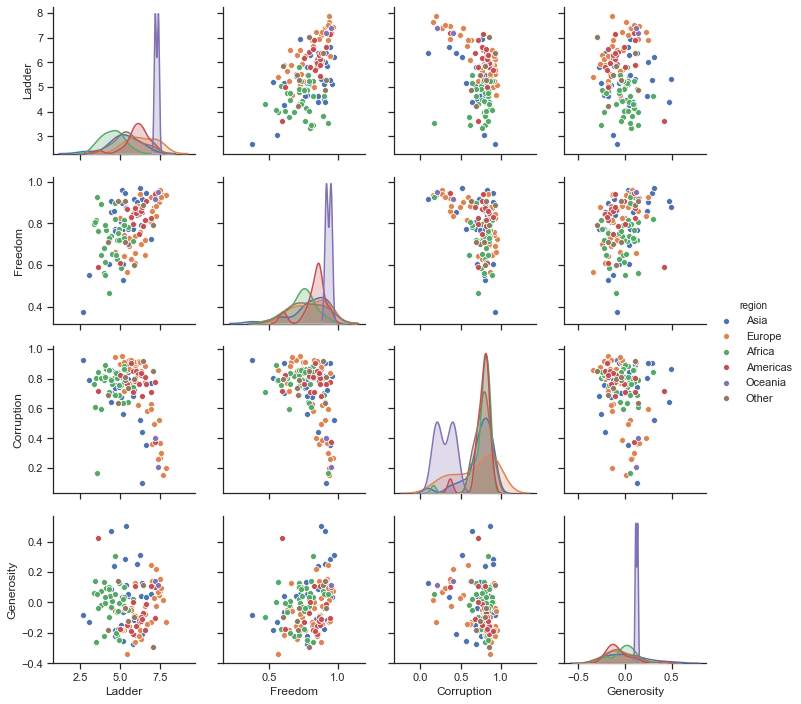

In [25]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=my_df[['Ladder', 'Freedom', 'Corruption', 'Generosity', 'region']], hue='region')

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

In [26]:
data.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy',
       'region'],
      dtype='object')

In [27]:
data_num = data[['Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy']]
data_num.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


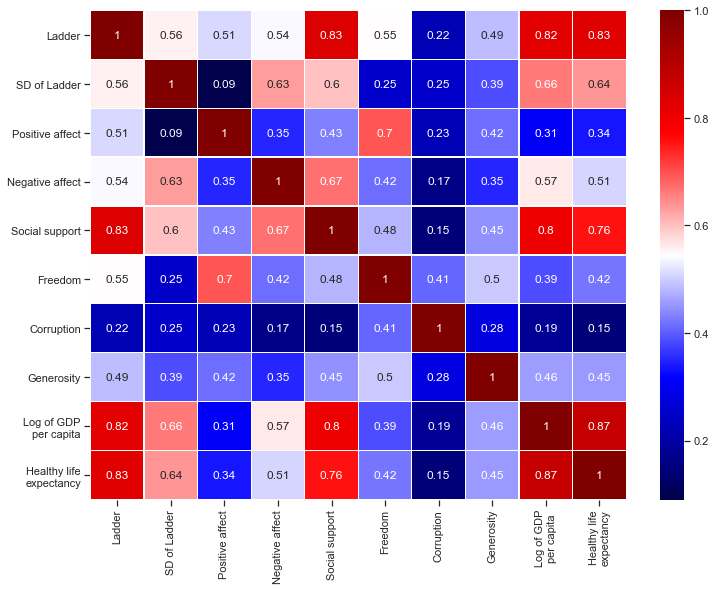

In [28]:
sns.heatmap(data_num.corr(),annot=True,cmap='seismic',linewidths=0.2)

Положение в рейтинге очень сильно зависит от социальной поддержки, ВВП страны и ожидаемой продолжительности жизни. В свою очередь, ожидаемая продолжительность жизни и социальная поддержка также сильно зависят от ВВП. Вывод простой - лучше быть богатым и здоровым, чем бедным и больным))

In [29]:
my_df.columns

Index(['Country (region)', 'Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom', 'Generosity', 'Corruption',
       'Positive affect', 'Negative affect', 'region'],
      dtype='object')

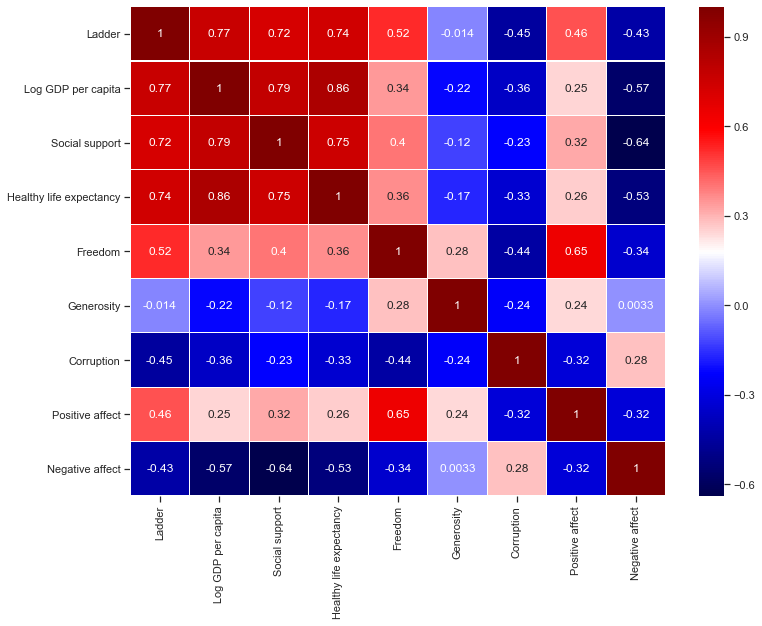

In [30]:
#And for raw data
my_df_num = my_df[['Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom', 'Generosity', 'Corruption',
       'Positive affect', 'Negative affect']]
sns.heatmap(my_df_num.corr(),annot=True,cmap='seismic',linewidths=0.2)
plt.show()

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

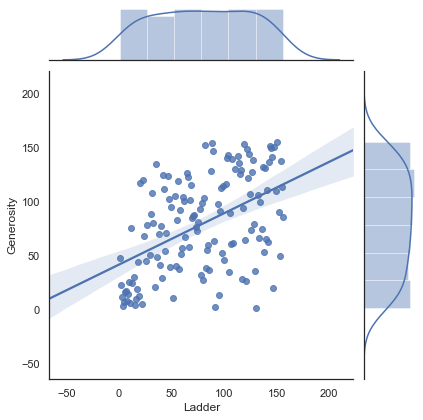

In [31]:
ladder = data['Ladder']
generosity = data['Generosity']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=ladder, y=generosity, data=data, kind='reg')
plt.show()

Собственное значение:  1.49 Собственный вектор:  [70.71067812 70.71067812]


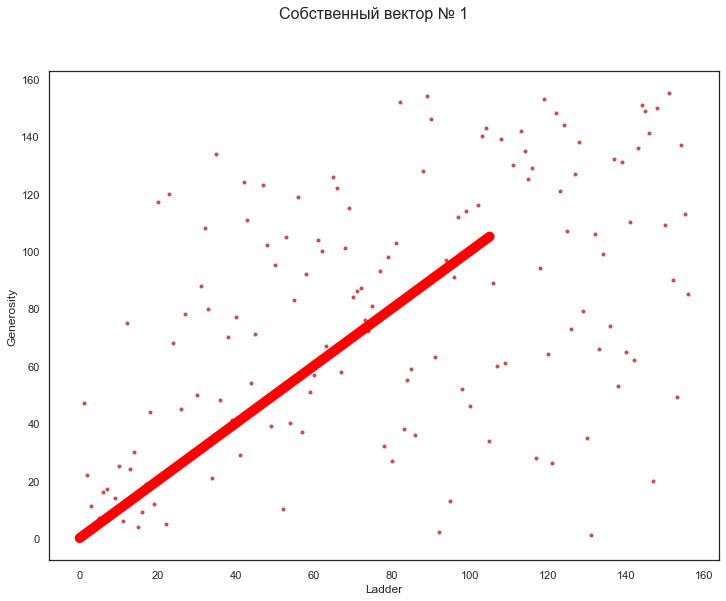

Собственное значение:  0.51 Собственный вектор:  [-70.71067812  70.71067812]


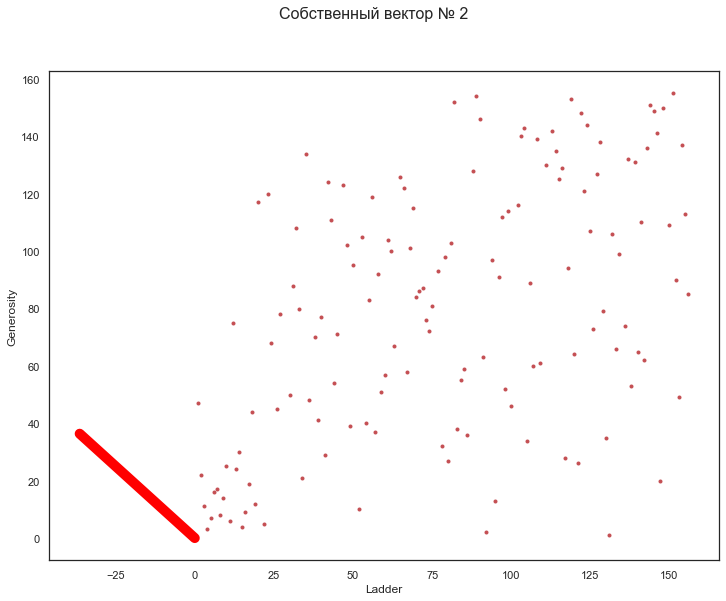

In [32]:
corr_array = data[['Ladder', 'Generosity']].corr().to_numpy()
w, v = np.linalg.eig(corr_array)
# v - vector, w- value
# print(v)
# print(w)

v = v*100 #Иначе не видно
for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(data['Ladder'], data['Generosity'], 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('Ladder')
    plt.ylabel('Generosity')
    plt.plot([0, w[i]*v[:,i][0]], [0, w[i] * v[:,i][1]],color='red', linewidth=10)
    plt.show()

Да, проекция на первый собственный вектор максимальна 

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Наверное, всеже имелась ввиду сумма. Просто для 10 и 1000 все просто. 10 - что-то, на 1000 получим равномерное распределение по корзинам

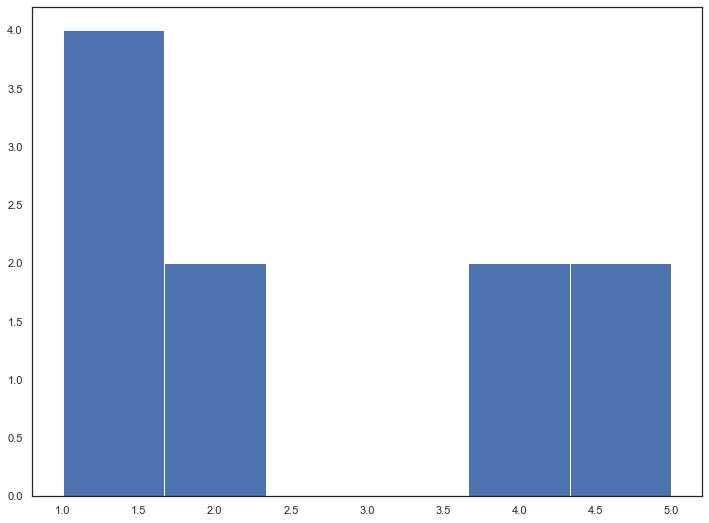

In [33]:
plt.hist(np.random.randint(6, size=10), bins=6)
plt.show()

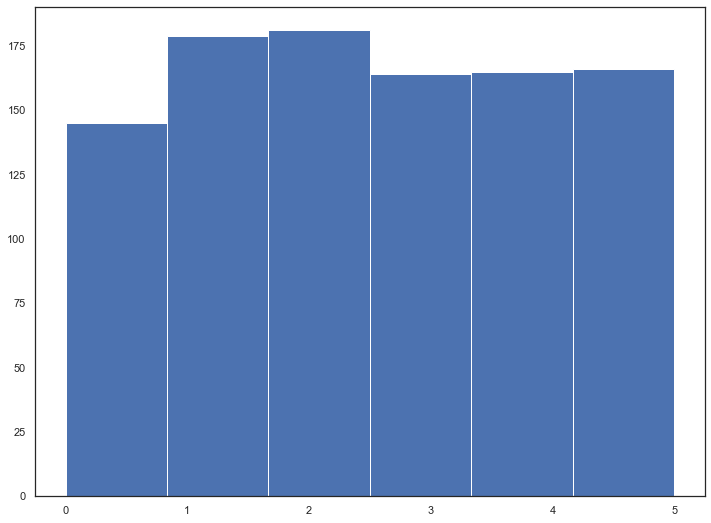

In [34]:
plt.hist(np.random.randint(6, size=1000), bins=6)
plt.show()

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

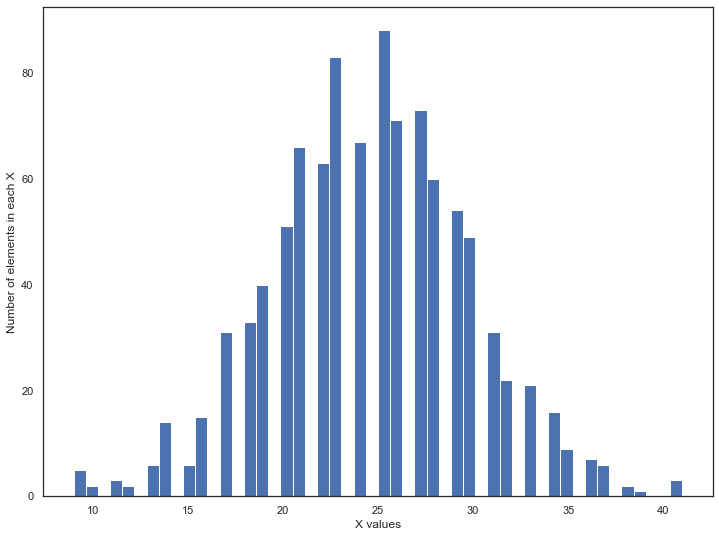

In [35]:
#Для 1000 сумм по 10- получили нормальное распределение
number_of_sums = 1000
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
    X1[i,0] = np.sum(np.random.randint(6, size=number_of_randoms))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()